#### Parallel Workflow 

Cricketer - (balls, runs, 6 or 4)

We need to calculate strike rate, boundary percentage, balls per bondary 

As we can parallely calculate Strike rate, boundary percentage and balls per boundary (so don't need to wait for another parameters)

In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict

In [ ]:
class CricketerState(TypedDict):
    runs: int
    balls: int 
    fours: int 
    sixes: int 

    sr: float 
    balls_per_boundary: float 
    boundary_percentage: float
    summary: str

In [23]:
def calculate_SR(state: CricketerState):
    sr = (state['runs']/state['balls'])*100
    return {'sr' : sr}

def calculate_BPB(state: CricketerState):
    bpb = (state['balls']/(state['fours']+state['sixes']))
    return {'balls_per_boundary' : bpb}

def calculate_Boundary_percentage(state: CricketerState):
    boundary_percent = ((state['fours']*4)+(state['sixes']*6))/state['runs']
    return {'boundary_percentage' : boundary_percent}

def summary(state: CricketerState):
    result = f"""
        Strike Rate : {state['sr']} \n 
        Balls per boundary : {state['balls_per_boundary']} \n 
        Boundary percentage : {state['boundary_percentage']}
    """
    return {'summary' : result}
    # returned only partials, so that state update will not conflict

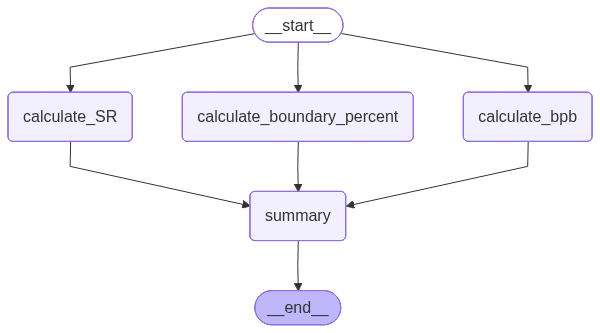

In [24]:
graph = StateGraph(CricketerState)

# add nodes 
graph.add_node('calculate_SR', calculate_SR)
graph.add_node('calculate_bpb', calculate_BPB)
graph.add_node('calculate_boundary_percent', calculate_Boundary_percentage)
graph.add_node('summary', summary)

# add edges
graph.add_edge(START, 'calculate_SR')
graph.add_edge(START, 'calculate_bpb')
graph.add_edge(START, 'calculate_boundary_percent')

graph.add_edge('calculate_SR', 'summary')
graph.add_edge('calculate_bpb', 'summary')
graph.add_edge('calculate_boundary_percent', 'summary')

graph.add_edge('summary', END)

# compile graph 
parallel_workflow = graph.compile()

# display graph 
from IPython.display import Image 
Image(parallel_workflow.get_graph().draw_mermaid_png())

In [25]:
output_state = parallel_workflow.invoke({'balls':20, 'runs':52, 'fours':4, 'sixes':6})
print(output_state)

{'runs': 52, 'balls': 20, 'fours': 4, 'sixes': 6, 'sr': 260.0, 'balls_per_boundary': 2.0, 'boundary_percentage': 1.0}
